Notebook purpose

- Explore entropy scores

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('/Users/fgu/dev/projects/entropy')
from entropy import config
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.figures.figures as figs

sns.set_style('whitegrid')
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'

df = aws.read_parquet(fp)
df.head(2)

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,savings,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_tag_auto,entropy_tag
0,688261,2012-01-03,777,400.00,mdbremoved,NaN,transfers,transfers,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,False,transfers,other account,other account,u,201201,-1542.99646,24319.220881,4.83494,2.880975
1,688264,2012-01-03,777,10.27,9572 30dec 11 mcdonalds restaurant winwick road gb,mcdonalds,spend,services,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,False,dining and drinking,NaN,dining and drinking,u,201201,-1542.99646,24319.220881,4.83494,2.880975


In [3]:
df.tag.nunique()

15

## User-level entropy

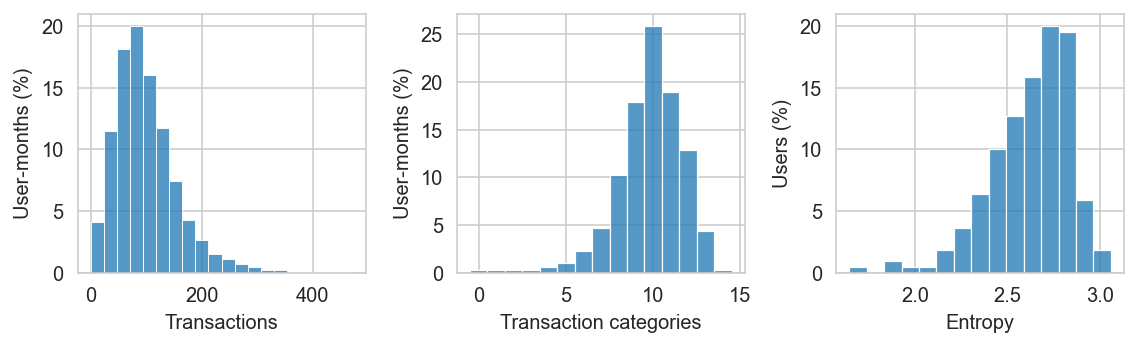

In [176]:
figs.txns_distrs(df, write=False)

## User-time level entropy

In [179]:
df[df.tag_auto.str.contains('payday', na=False)]

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,savings,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_tag_auto,entropy_tag
10706,10757329,2013-09-23,28877,-300.000000,wonga com mdbremoved,wonga,spend,finance,True,ab22 8,2013-11-12,NaN,1988.0,2013-11-12,195157,2014-07-02 16:54:00,bank of scotland (bos),current,2014-07-18,2017-08-14,False,443.839996,wonga,False,payday loan,NaN,payday loan funds,u,201309,-315.080170,16383.959766,6.332940,2.912048
10712,10757318,2013-10-01,28877,333.000000,wonga cd 4226,wonga,spend,finance,True,ab22 8,2013-11-12,NaN,1988.0,2013-11-12,195157,2014-07-02 16:54:00,bank of scotland (bos),current,2014-07-18,2015-03-19,True,443.839996,wonga,False,payday loan,NaN,payday loan,u,201310,55.899811,16383.959766,6.332940,2.912048
15644,436801103,2018-08-08,30977,5.000000,mdbremoved wonga mdbremoved,wonga,spend,finance,True,sw9 9,2013-12-22,NaN,1987.0,2013-12-22,72367,2020-03-12 01:40:00,natwest bank,current,2018-08-13,2018-12-10,True,458.760010,wonga,False,payday loan,NaN,payday loan,u,201808,-1158.320190,28358.960938,4.455994,2.635202
37501,320828786,2018-02-26,85977,-1100.000000,mdbremoved,pounds to pocket,spend,finance,True,cf61 2,2014-07-04,NaN,1983.0,2014-07-04,152138,2020-03-10 20:58:00,lloyds bank,current,2018-03-02,2019-02-04,False,-3590.159912,pounds to pocket,False,payday loan funds,NaN,payday loan funds,u,201802,94.757324,20866.349609,4.556808,2.749356
37616,331710729,2018-03-26,85977,172.929993,pounds to pocket cd 1814 deb,pounds to pocket,spend,finance,True,cf61 2,2014-07-04,NaN,1983.0,2014-07-04,152138,2020-03-10 20:58:00,lloyds bank,current,2018-03-28,1900-01-01,True,-3590.159912,pounds to pocket,False,payday loan,NaN,payday loan,c,201803,-236.332520,20866.349609,4.556808,2.749356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604971,705336085,2019-03-18,570077,144.190002,card payment to pounds to pocket 144 19 gbp rate 1 00 gbp on 15 03 2019,pounds to pocket,spend,finance,False,n22 5,2020-02-07,10k to 20k,1966.0,2020-02-07,1589100,2020-08-16 21:13:00,santander,current,2020-02-08,2020-02-12,True,-433.149994,pounds to pocket,False,payday loan,NaN,payday loan,u,201903,-1325.690674,31025.990234,3.839662,2.110656
604996,705113813,2019-03-20,570077,23.620001,lendingstream couk on 19 mar bcc,lending stream,spend,finance,False,n22 5,2020-02-07,10k to 20k,1966.0,2020-02-07,1589096,2020-08-01 20:38:00,barclays,current,2020-02-08,2020-02-12,True,-48.380001,lending stream,False,payday loan,NaN,payday loan,u,201903,-548.620117,31025.990234,3.839662,2.110656
605133,705046022,2019-04-15,570077,144.190002,card payment to pounds to pocket 144 19 gbp rate 1 00 gbp on 12 04 2019,pounds to pocket,spend,finance,False,n22 5,2020-02-07,10k to 20k,1966.0,2020-02-07,1589100,2020-08-16 21:13:00,santander,current,2020-02-08,2020-02-12,True,-433.149994,pounds to pocket,False,payday loan,NaN,payday loan,u,201904,-991.990479,31025.990234,3.839662,2.110656
638149,734575392,2019-08-28,577877,-20.000000,mdbremoved wonga bgc,wonga,spend,finance,True,po9 3,2020-03-21,10k to 20k,1991.0,2020-03-21,1641840,2020-06-18 22:54:00,barclays,current,2020-03-22,1900-01-01,False,-1026.630005,wonga,False,payday loan,NaN,payday loan,c,201908,-577.830933,51520.019531,4.946888,2.787262
